<a href="https://colab.research.google.com/github/kurtsenol/Text-Classification/blob/main/method_clf_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pickle5

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle5 as pickle
import re
import random

In [ ]:
df_method =pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_method.pkl")
df_method

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_all_final.pkl", "rb") as fh:
  df = pickle.load(fh)

In [ ]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df.dropna(subset=["methodology"], inplace=True)

In [ ]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df["PY"].fillna(2010, inplace=True)

In [ ]:
df["PY"] = df.PY.astype("int")

In [ ]:
df.isnull().sum()

JO              0
AU              0
TI              0
PY              0
DI              1
urls           83
filename       84
methodology     0
dtype: int64

In [ ]:
df.drop_duplicates(subset="TI")

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3071,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3072,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3073,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3074,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df_merged = pd.merge(df_method[["TI", "QUANTITATIVE", "Method"]], df, left_on="TI", right_on="TI")
df_merged

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
0,Towards a hierarchy of hotel guests' in-room n...,0,phenomenology,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,A meta-regression on the effect of online rati...,0,review,IJCHM,"Hu, XB; Yang, Y; Park, S",2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [ ]:
df_merged.isnull().sum()

TI               0
QUANTITATIVE     0
Method           0
JO               0
AU               0
PY               0
DI               1
urls            83
filename        84
methodology      0
dtype: int64

In [ ]:
df_merged.Method.value_counts()

survey               1511
secondary data        525
experimental          346
qualitative           177
mixed                 112
content analysis      104
case study             99
review                 76
scale development      38
bibliometric           18
grounded theory        16
phenomenology          15
theoretical            11
meta-analysis           7
ethnography             6
sna                     5
textual analysis        4
delphi                  3
field study             1
research note           1
interview               1
Name: Method, dtype: int64

In [ ]:
df_filtered = df_merged.groupby("Method").filter(lambda x: len(x)>100)
df_filtered

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
5,Prices of short-stay accommodation: time serie...,1,secondary data,IJCHM,"Gricar, S; Bojnec, S",2019,10.1108/IJCHM-01-2019-0091,https://www.emerald.com/insight/content/doi/10...,IJCHM_5.txt,Empirical setting\nIn terms of relevant econom...
6,How do online reviewers' cultural traits and p...,1,content analysis,IJCHM,"Mariani, M; Predvoditeleva, M",2019,10.1108/IJCHM-11-2018-0927,https://www.emerald.com/insight/content/doi/10...,IJCHM_7.txt,"3. Research setting, design and methodology\n3..."
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [ ]:
df_filtered = df_filtered[df_filtered.Method!="mixed"]

In [ ]:
len(df_filtered)

2663

In [ ]:
df_filtered.Method.value_counts()

survey              1511
secondary data       525
experimental         346
qualitative          177
content analysis     104
Name: Method, dtype: int64

In [ ]:
df_filtered.Method.value_counts(normalize=True)

survey              0.567405
secondary data      0.197146
experimental        0.129929
qualitative         0.066466
content analysis    0.039054
Name: Method, dtype: float64

In [ ]:
df_filtered['method_id'] = df_filtered['Method'].factorize()[0]
# category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'Product']].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_filtered = df_filtered.sample(frac=1).reset_index(drop=True)

In [ ]:
df_filtered["Method"] = df_filtered.Method.replace({'content analysis':"content", "secondary data":"secondary"})

In [ ]:
df_filtered.head()

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology,method_id
0,Justice perceptions and drives of hotel employ...,1,survey,IJHM,"Luo, ZP; Qu, HL; Marnburg, E",2013,10.1016/j.ijhm.2012.11.005,https://www.sciencedirect.com/science/article/...,IJHM_457.txt,3. Methods\n3.1. Sample and procedure\nThe tar...,1
1,Are employees with higher organization-based s...,1,survey,IJHM,"Lin, NQ; Jang, J; Roberts, KR",2018,10.1016/j.ijhm.2018.01.021,https://www.sciencedirect.com/science/article/...,IJHM_1211.txt,3. Methodology\n3.1. Sample and data collectio...,1
2,Effect of diversification on firm performance:...,1,secondary,IJHM,"Park, K; Jang, S",2012,10.1016/j.ijhm.2011.03.011,https://www.sciencedirect.com/science/article/...,IJHM_241.txt,3. Methodology\n3.1. Data\nThis study used div...,0
3,The negative synergistic effect of internation...,1,secondary,IJCHM,"Jung, SY; Lee, S; Dalbor, M",2016,10.1108/IJCHM-07-2014-0361,https://www.emerald.com/insight/content/doi/10...,IJCHM_558.txt,3. Methodology\n3.1 Data\nThis study utilizes ...,0
4,Tourist Shoppers' Evaluation of Retail Service...,1,survey,JHTR,"Sharma, P; Chen, ISN; Luk, STK",2018,10.1177/1096348015584439,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_195.txt,Methodology\nWe tested all our hypotheses (Fig...,1


In [ ]:
method_id_df = df_filtered[['Method', 'method_id']].drop_duplicates().sort_values('method_id')
method_to_id = dict(method_id_df.values)
method_to_id

{'content': 3,
 'experimental': 2,
 'qualitative': 4,
 'secondary': 0,
 'survey': 1}

In [ ]:
id_to_method = dict(method_id_df[['method_id', 'Method']].values)
id_to_method

{0: 'secondary',
 1: 'survey',
 2: 'experimental',
 3: 'content',
 4: 'qualitative'}

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional, BatchNormalization

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vocab_size = 500 # make the top list of words (common words)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8

In [ ]:
df_filtered["methodology"] = df_filtered.methodology.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS) if len(word)>2 if word.isalpha()]))

In [ ]:
df_filtered.head()

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology,method_id
0,Justice perceptions and drives of hotel employ...,1,survey,IJHM,"Luo, ZP; Qu, HL; Marnburg, E",2013,10.1016/j.ijhm.2012.11.005,https://www.sciencedirect.com/science/article/...,IJHM_457.txt,Methods Sample procedure The target population...,1
1,Are employees with higher organization-based s...,1,survey,IJHM,"Lin, NQ; Jang, J; Roberts, KR",2018,10.1016/j.ijhm.2018.01.021,https://www.sciencedirect.com/science/article/...,IJHM_1211.txt,Methodology Sample data collection Before pilo...,1
2,Effect of diversification on firm performance:...,1,secondary,IJHM,"Park, K; Jang, S",2012,10.1016/j.ijhm.2011.03.011,https://www.sciencedirect.com/science/article/...,IJHM_241.txt,Methodology Data This study used diversificati...,0
3,The negative synergistic effect of internation...,1,secondary,IJCHM,"Jung, SY; Lee, S; Dalbor, M",2016,10.1108/IJCHM-07-2014-0361,https://www.emerald.com/insight/content/doi/10...,IJCHM_558.txt,Methodology Data This study utilizes four reso...,0
4,Tourist Shoppers' Evaluation of Retail Service...,1,survey,JHTR,"Sharma, P; Chen, ISN; Luk, STK",2018,10.1177/1096348015584439,https://journals.sagepub.com/doi/full/10.1177/...,JHTR_195.txt,Methodology tested hypotheses survey Hong chos...,1


In [ ]:
articles = list(df_filtered.methodology)
labels = list(df_filtered.Method)

In [ ]:
train_size = int(len(df_filtered) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

#####Tokenization
We set the tokenization with num_words is vocab_size (5000), and oov_token is ‘<OOV>’ . And we call the method fits_on_texts on train_articles. This method creates the vocabulary index based on word frequency.
For example if we give the text “The cat sat on the mat.”, it will create a dictonary {‘<OOV>’: 1, ‘cat’: 3, ‘mat’: 6, ‘on’: 5, ‘sat’: 4, ‘the’: 2}.

The oov_token is the value ‘<OOV>’ that we put if the word is not listed in the dictionary.

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

#####Convert to Sequences
Machine learning works well with the numbers. After tokenization, we call the method text_to_sequences. It transforms each text in texts to a sequence of integers. Basically, it takes each word in the text and replaces it with its corresponding integer value from the dictionary tokenizer.word_index. If the word is not in the dictionary, it will put the value of 1.
For example, if we give the text “the cat sat on my table”, we will get the sequence: [2, 3, 4, 5, 1, 1]. The last two [1,1] is for the word “my table” which is not in the dictionary.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

#####Sequence Truncation and Padding
Those sequences are not in the same size, we need to make them in same size (concrete shape) when we train them for NLP. We need to use padding and truncate them so all sequences will be in the same size. We use post for padding_type and truncate_type.

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

We need to do the same thing here as we did before when we deal with the features, articles. As the model doesn’t understand the words, we need to convert the label into numbers. We do tokenization and convert to sequence as before. When doing the tokenization, we don’t indicate the vocab size and oov_token.

In [ ]:
set(labels)

{'content', 'experimental', 'qualitative', 'secondary', 'survey'}

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
training_label_seq

array([[1],
       [1],
       [2],
       ...,
       [1],
       [3],
       [1]])

In [ ]:
validation_label_seq[:10]

array([[3],
       [1],
       [3],
       [1],
       [1],
       [4],
       [2],
       [3],
       [2],
       [3]])

In [ ]:
label_tokenizer.word_index

{'content': 5,
 'experimental': 3,
 'qualitative': 4,
 'secondary': 2,
 'survey': 1}

####Create Model

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(6,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          32000     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 98,822
Trainable params: 98,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [ ]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
67/67 - 6s - loss: 1.2941 - accuracy: 0.5620 - val_loss: 1.1596 - val_accuracy: 0.5516
Epoch 2/30
67/67 - 1s - loss: 0.9890 - accuracy: 0.6254 - val_loss: 1.0812 - val_accuracy: 0.7111
Epoch 3/30
67/67 - 1s - loss: 0.8299 - accuracy: 0.7347 - val_loss: 0.8004 - val_accuracy: 0.7505
Epoch 4/30
67/67 - 1s - loss: 0.6787 - accuracy: 0.7826 - val_loss: 0.7461 - val_accuracy: 0.7392
Epoch 5/30
67/67 - 1s - loss: 0.6322 - accuracy: 0.7953 - val_loss: 0.7299 - val_accuracy: 0.7674
Epoch 6/30
67/67 - 1s - loss: 0.5610 - accuracy: 0.8070 - val_loss: 0.6584 - val_accuracy: 0.7730
Epoch 7/30
67/67 - 1s - loss: 0.6011 - accuracy: 0.8047 - val_loss: 0.7187 - val_accuracy: 0.7448
Epoch 8/30
67/67 - 1s - loss: 0.6252 - accuracy: 0.8005 - val_loss: 0.6790 - val_accuracy: 0.7767
Epoch 9/30
67/67 - 1s - loss: 0.4775 - accuracy: 0.8404 - val_loss: 0.6483 - val_accuracy: 0.7955
Epoch 10/30
67/67 - 1s - loss: 0.4321 - accuracy: 0.8653 - val_loss: 0.6353 - val_accuracy: 0.8218
Epoch 11/30
67/67 -

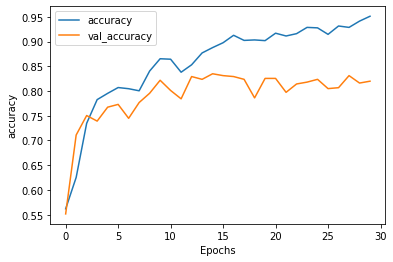

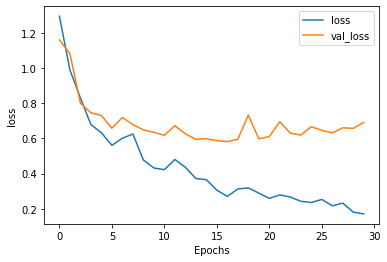

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
txt= [df_filtered.methodology.iloc[-145]]
txt

['Conjoint Model Because people make choosing conjoint analysis appropriate methodology analyze examines joint effect two independent variables ordering dependent variable measure psychological judgments customer preferences Srinivasan Sohn Although respondents may able rank various rate fences order unlikely would capable assigning meaningful mathematical values Using conjoint find Chinese travelers sample among different levels rate fences']

In [ ]:
label_tokenizer.word_index

{'content': 5,
 'experimental': 3,
 'qualitative': 4,
 'secondary': 2,
 'survey': 1}

In [ ]:
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

print(pred)
print(np.argmax(pred))

[[0.00191054 0.01801953 0.96220666 0.00251743 0.00100898 0.01433688]]
2


In [ ]:
df_filtered.Method.iloc[-145]

'experimental'